In [1]:
# 1) Euler Algorithm

class Particle:
    def __init__(self, x=0.5, v=1, dt=0.01):
        self.x = x  # initial position
        self.v = v  # initial velocity
        self.dt = dt  # time step

    def update(self):
        self.x = self.x + self.v * self.dt  # Euler Algorithm
        self.v = self.v - self.x * self.dt  # F = -kx, m = 1
        return self.x

    def total_energy(self):
        return ((self.x**2)/2 + (self.v**2)/2)

# Creating a Particle instance for the harmonic oscillator
particle = Particle()
l = []
for k in range(10000):
    l.append(particle.update())
# print(l)

# Evolve the system for a certain number of steps

# Print the final position
print(f"Final position : {particle.x}")
print(particle.total_energy())

Final position : -0.07601275759413421
0.627924936459194


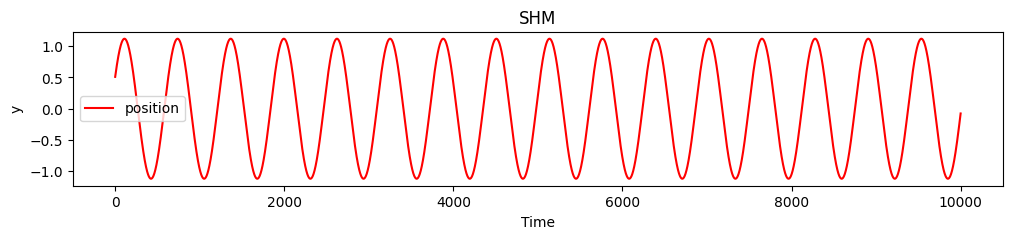

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,2))
        
plt.plot( l,'r', label='position') 
        
plt.title('SHM')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

In [3]:
max(l)

1.1202817905771785

In [9]:
max(l2)

1.1158095495179887

In [4]:
l.index(1.1202817905771785)

4508

In [8]:
l2.index(1.1158095495179887)

8906

In [7]:
# 2) Euler Cromer Algorithm

class Particle2:
    def __init__(self, x=0.5, v=1, dt=0.01):
        self.x = x  # initial position
        self.v = v  # initial velocity
        self.dt = dt  # time step

    def update(self):
        self.v = self.v - self.x * self.dt
        self.x = self.x + self.v * self.dt  # Euler Cromer Algorithm
                                            # F = -kx, m = 1
        return self.x

    def total_energy(self):
        return ((self.x**2)/2 + (self.v**2)/2)

# Creating a Particle instance for the harmonic oscillator
particle2 = Particle2()
l2 = []
for k in range(10000):
    l2.append(particle2.update())
# print(l)

# Evolve the system for a certain number of steps

# Print the final position
print(f"Final position : {particle2.x}")
print(particle2.total_energy())

Final position : -0.0734826945001894
0.6220910665889452


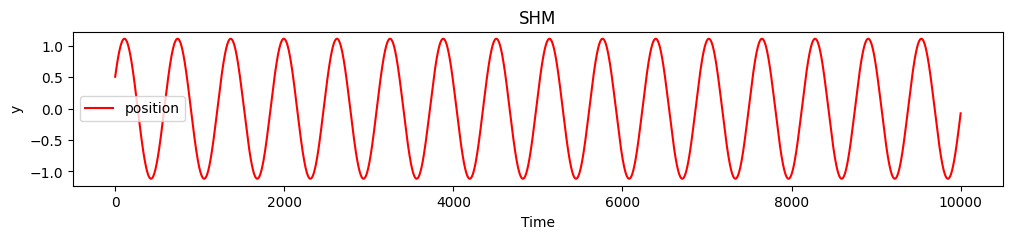

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,2))
        
plt.plot( l2,'r', label='position')        
plt.title('SHM')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

In [11]:
l == l2

False

In [12]:
len(l2)

10000

In [13]:
i = 0
for k in range(10000):
    if l[k]!=l2[k]:
        i+=1
print(i)        

10000


In [15]:
for k in range(10):
     print(l[k]-l2[k])

4.999999999999449e-05
9.999500000001937e-05
0.00014998000050003846
0.00019995000299999344
0.0002499000104996263
0.0002998250279983017
0.00034972006299405223
0.0003995801259836229
0.0004494002309605172
0.0004991753959142642


In [16]:
l[9000]-l2[9000]

0.004446554819777182

In [17]:
l[100]-l2[100]

0.004234223342536536

In [18]:
# 3 Euler-Richardson Algorithm

class Particle3:
    def __init__(self, mass, initial_position, initial_velocity,dt):
        self.mass = mass
        self.position = initial_position
        self.velocity = initial_velocity
        self.dt = dt

    def force(self, position):
        # Define the force acting on the particle (Example: Simple harmonic motion F = -kx)
        k = 1  # Spring constant (for example)
        return -k * position

    def euler_richardson_step(self):
        # Calculate acceleration at the current position
        a_n = self.force(self.position) / self.mass
        v_mid = self.velocity +0.5*a_n*self.dt
        y_mid = self.position +0.5*self.velocity*self.dt
        a_mid = self.force(y_mid) / self.mass

        self.velocity = self.velocity + a_mid*self.dt
        self.position = self.position + v_mid*self.dt

        return self.position

# Initialize a particle
mass = 1
initial_position = 0.5
initial_velocity = 1
particle3 = Particle3(mass, initial_position, initial_velocity, 0.01)

l3 = []
for k in range(10000):
    l3.append(particle3.euler_richardson_step())

print(l3[-1])

-0.07334790451187599


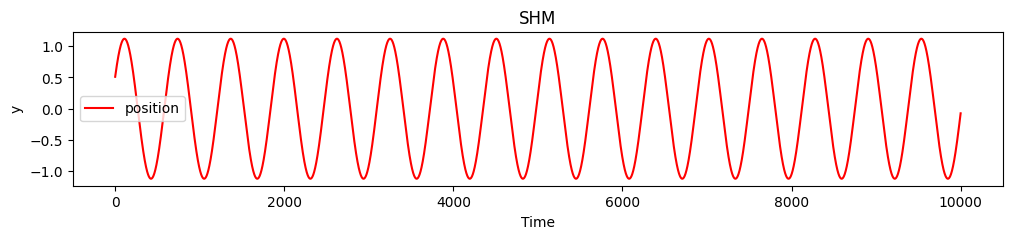

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,2))
        
plt.plot( l3,'r', label='position')        
plt.title('SHM')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

# For 3 body

In [1]:
import numpy as np
class sources():
    def __init__(self,m,x,y,ux,uy,dt):
        self.m = m
        self.ux = ux
        self.uy = uy
        self.x = x
        self.y = y
        self.dt = dt

    def force_x(self,m1,m2,x,y,x1,y1,x2,y2):
        d1 = abs(((x1-x)**2 + (y1-y)**2)**0.5)
        d2 = abs(((x2-x)**2 + (y2-y)**2)**0.5)
        angle = np.arctan2(y-y1, x-x1)
        angle2 = np.arctan2(y-y2, x-x2)
        return ((-1*6.67408*(10**-11)*self.m*m1)/(d1)**2)* np.cos(angle)+ ((-1*6.67408*(10**-11)*self.m*m2)/(d2)**2)*np.cos(angle2)
 
    def force_y(self,m1,m2,x,y,x1,y1,x2,y2):
        d1 = abs(((x1-x)**2 + (y1-y)**2)**0.5)
        d2 = abs(((x2-x)**2 + (y2-y)**2)**0.5)
        angle = np.arctan2(y-y1, x-x1)
        angle2 = np.arctan2(y-y2, x-x2)
        return ((-1*6.67408*(10**-11)*self.m*m1)/(d1)**2)*np.sin(angle)+ ((-1*6.67408*(10**-11)*self.m*m2)/(d2)**2)*np.sin(angle2)  

    def euler_richardson_step(self,m1,m2,x1,y1,x2,y2):
        # Calculate acceleration at the current position
        an_x = self.force_x(m1,m2,self.x,self.y,x1,y1,x2,y2) / self.m
        an_y = self.force_y(m1,m2,self.x,self.y,x1,y1,x2,y2) / self.m
        v_mid_x = self.ux +0.5*an_x*self.dt
        y_mid_x = self.x +0.5*self.ux*self.dt
       
        v_mid_y = self.uy +0.5*an_y*self.dt
        y_mid_y = self.y +0.5*self.uy*self.dt
        a_mid_y = self.force_y(m1,m2,y_mid_x,y_mid_y,x1,y1,x2,y2) / self.m 
        a_mid_x = self.force_x(m1,m2,y_mid_x,y_mid_y,x1,y1,x2,y2) / self.m

        self.ux = self.ux + a_mid_x*self.dt
        self.x = self.x + v_mid_x*self.dt        

        self.uy = self.uy + a_mid_y*self.dt
        self.y = self.y + v_mid_y*self.dt

In [2]:
# 1 hour time step

sun = sources(1.989e30, 0, 0, 0, 0, 3600)  # Sun
earth = sources(5.972e24, 1.496e11, 0, 0, 29780, 3600)  # Earth
venus = sources(4.867e24, 1.08e11, 0, 0, 35260, 3600)  # Venus

In [3]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []


for k in range(10000):
    list1.append(earth.x)
    list2.append(earth.y)       
    earth.euler_richardson_step(sun.m,venus.m,sun.x,sun.y,venus.x,venus.y)
 
    list3.append(venus.x)
    list4.append(venus.y)    
    venus.euler_richardson_step(sun.m,earth.m,sun.x,sun.y,earth.x,earth.y)
     
    list5.append(sun.x)
    list6.append(sun.y)     
    sun.euler_richardson_step(earth.m,venus.m,earth.x,earth.y,venus.x,venus.y)    

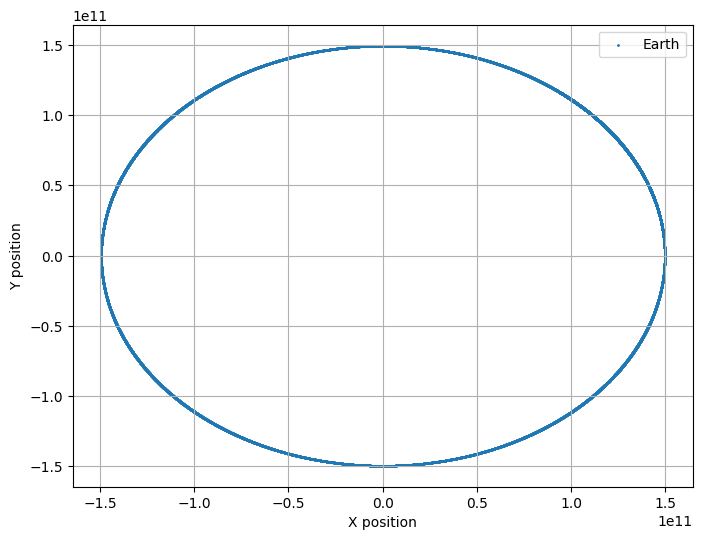

In [4]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(list1, list2, label='Earth', s = 1)
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.grid(True)
plt.show()

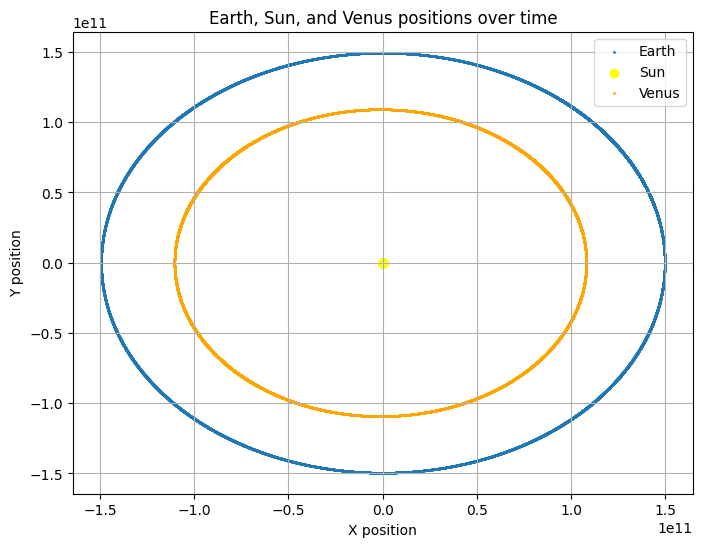

In [5]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(list1, list2, label='Earth', s = 1)
plt.scatter(list5, list6, color='yellow', label='Sun')
plt.scatter(list3, list4, color='orange', label='Venus',s = 1)
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Earth, Sun, and Venus positions over time')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
class observers():
    def __init__(self,m,u,x,y,dt):
        self.m = m
        self.u = u
        self.x = x
        self.y = y
        self.dt = dt

    def force(self,mass,dis):
        return (-1*6.67408*(10**-11)*self.m*mass)/(dis)**2    
            

In [ ]:
class massive_bodies():
    def __init__(self,m,u,x,y,dt):
        self.m = m
        self.u = u
        self.x = x
        self.y = y
        self.dt = dt
    
    def force(self,mass,dis):
        return (-1*6.67408*(10**-11)*self.m*mass)/(dis)**2

# For 4 BODY

In [33]:
import numpy as np
class sources():
    def __init__(self,m,x,y,ux,uy,dt):
        self.m = m
        self.ux = ux
        self.uy = uy
        self.x = x
        self.y = y
        self.dt = dt

    def force_x(self,m1,m2,m3,x,y,x1,y1,x2,y2,x3,y3):
        d1 = abs(((x1-x)**2 + (y1-y)**2)**0.5)
        d2 = abs(((x2-x)**2 + (y2-y)**2)**0.5)
        d3 = abs(((x3-x)**2 + (y3-y)**2)**0.5)
        angle = np.arctan2(y-y1, x-x1)
        angle2 = np.arctan2(y-y2, x-x2)
        angle3 = np.arctan2(y-y3, x-x3)
        return ((-1*6.67408*(10**-11)*self.m*m1)/(d1)**2)* np.cos(angle)+ ((-1*6.67408*(10**-11)*self.m*m2)/(d2)**2)*np.cos(angle2)+((-1*6.67408*(10**-11)*self.m*m3)/(d3)**2)* np.cos(angle3)
 
    def force_y(self,m1,m2,m3,x,y,x1,y1,x2,y2,x3,y3):
        d1 = abs(((x1-x)**2 + (y1-y)**2)**0.5)
        d2 = abs(((x2-x)**2 + (y2-y)**2)**0.5)
        d3 = abs(((x3-x)**2 + (y3-y)**2)**0.5)      
        angle = np.arctan2(y-y1, x-x1)
        angle2 = np.arctan2(y-y2, x-x2)
        angle3 = np.arctan2(y-y3, x-x3)
        return ((-1*6.67408*(10**-11)*self.m*m1)/(d1)**2)*np.sin(angle)+ ((-1*6.67408*(10**-11)*self.m*m2)/(d2)**2)*np.sin(angle2) +((-1*6.67408*(10**-11)*self.m*m3)/(d3)**2)*np.sin(angle3)

    def euler_richardson_step(self,m1,m2,m3,x1,y1,x2,y2,x3,y3):
        # Calculate acceleration at the current position
        an_x = self.force_x(m1,m2,m3,self.x,self.y,x1,y1,x2,y2,x3,y3) / self.m
        an_y = self.force_y(m1,m2,m3,self.x,self.y,x1,y1,x2,y2,x3,y3) / self.m
        v_mid_x = self.ux +0.5*an_x*self.dt
        y_mid_x = self.x +0.5*self.ux*self.dt
       
        v_mid_y = self.uy +0.5*an_y*self.dt
        y_mid_y = self.y +0.5*self.uy*self.dt
        a_mid_y = self.force_y(m1,m2,m3,y_mid_x,y_mid_y,x1,y1,x2,y2,x3,y3) / self.m 
        a_mid_x = self.force_x(m1,m2,m3,y_mid_x,y_mid_y,x1,y1,x2,y2,x3,y3) / self.m

        self.ux = self.ux + a_mid_x*self.dt
        self.x = self.x + v_mid_x*self.dt        

        self.uy = self.uy + a_mid_y*self.dt
        self.y = self.y + v_mid_y*self.dt

# 1 hour time step

sun = sources(1.989e30, 0, 0, 0, 0, 3600)  # Sun
earth = sources(5.972e24, 1.496e11, 0, 0, 29780, 3600)  # Earth
venus = sources(4.867e24, 1.08e11, 0, 0, 35260, 3600)  # Venus
mars = sources(6.4171e23, 2.2794e11, 0, 0, 24077, 3600) #mars

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []


for k in range(20000):
    list1.append(earth.x)
    list2.append(earth.y)       
    earth.euler_richardson_step(sun.m,venus.m,mars.m,sun.x,sun.y,venus.x,venus.y,mars.x,mars.y)
 
    list3.append(venus.x)
    list4.append(venus.y)    
    venus.euler_richardson_step(sun.m,earth.m,mars.m,sun.x,sun.y,earth.x,earth.y,mars.x,mars.y)
     
    list5.append(sun.x)
    list6.append(sun.y)     
    sun.euler_richardson_step(earth.m,venus.m,mars.m,earth.x,earth.y,venus.x,venus.y,mars.x,mars.y) 

    list7.append(mars.x)
    list8.append(mars.y)     
    mars.euler_richardson_step(earth.m,venus.m,sun.m,earth.x,earth.y,venus.x,venus.y,sun.x,sun.y)

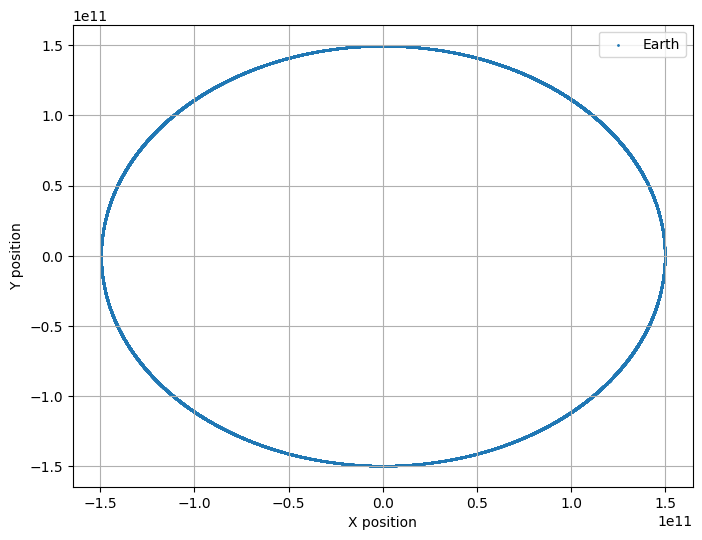

In [34]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(list1, list2, label='Earth', s = 1)
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.grid(True)
plt.show()

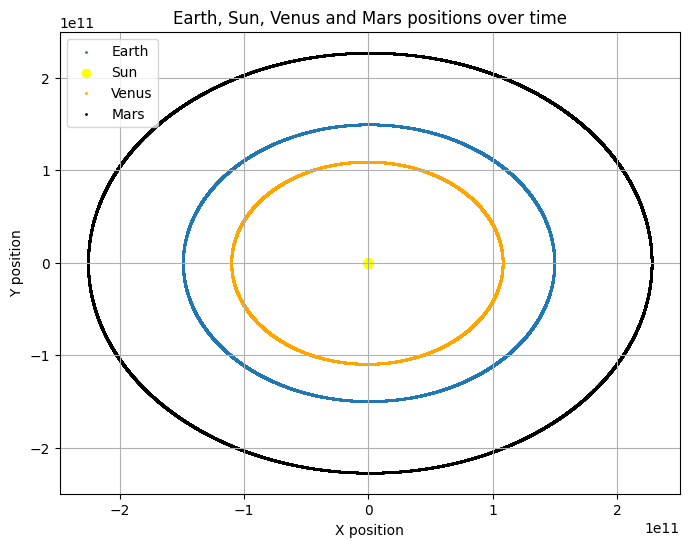

In [63]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(list1, list2, label='Earth', s = 1)
plt.scatter(list5, list6, color='yellow', label='Sun')
plt.scatter(list3, list4, color='orange', label='Venus',s = 1)
plt.scatter(list7, list8, color='black', label='Mars',s = 1)
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Earth, Sun, Venus and Mars positions over time')
plt.legend()
plt.grid(True)
plt.show()

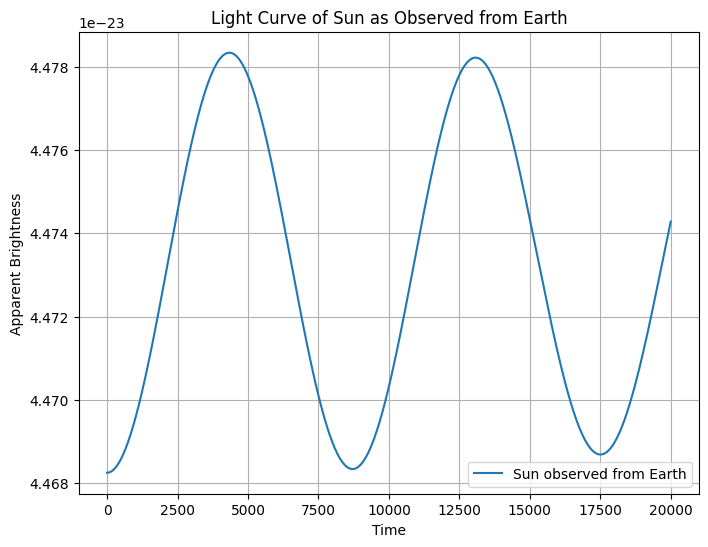

In [78]:
# Function to calculate distance between two points
def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def calculate_apparent_brightness(distance):
    return 1 / (distance ** 2)  # Assuming inverse square law for brightness

# Calculate distances between Sun and Earth at each time step
distances_sun_earth = [distance(list5[i], list6[i], list1[i], list2[i]) for i in range(len(list1))]

# Calculate apparent brightness for each distance
apparent_brightness_sun_from_earth = [calculate_apparent_brightness(dist) for dist in distances_sun_earth]

# Plotting the light curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(apparent_brightness_sun_from_earth, label='Sun observed from Earth')
plt.xlabel('Time')
plt.ylabel('Apparent Brightness')
plt.title('Light Curve of Sun as Observed from Earth')
plt.legend()
plt.grid(True)
plt.show()